# Problem Statement

- __Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban, and rural areas. Customer first applies for a home loan and after that company validates the customer eligibility for the loan.__

- __The company wants to automate the loan eligibility process (real time) based on customer detail provided while filling an online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others.__

- __To automate this process, they have provided a dataset to identify the customer segments that are eligible for loan amounts so that they can specifically target these customers.__

- __It is necessary to find the eligible customer segments as it will protect the company from getting in loss.__

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train_ctrUa4K.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.describe(include = 'all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [4]:
data.shape

(614, 13)

In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# We can try filling the null values using imputers

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Missing values are present

In [7]:
data1 = data.dropna(inplace = True)
data1

In [8]:
for col in data.columns:
    print(col,data[col].nunique())

Loan_ID 480
Gender 2
Married 2
Dependents 4
Education 2
Self_Employed 2
ApplicantIncome 405
CoapplicantIncome 232
LoanAmount 186
Loan_Amount_Term 9
Credit_History 2
Property_Area 3
Loan_Status 2


In [9]:
data = data.drop(columns= ["Loan_ID"])
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


D:\python3.10.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

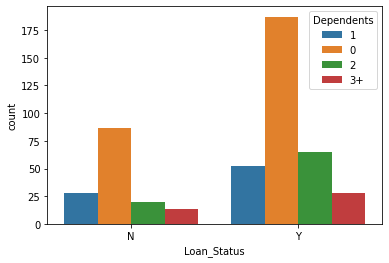

In [10]:
sns.countplot(data.Loan_Status,hue= data.Dependents)


D:\python3.10.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

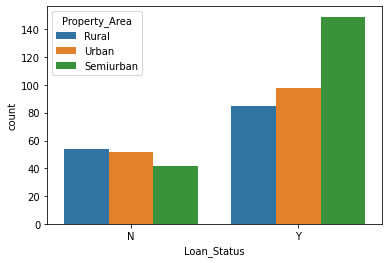

In [11]:
sns.countplot(data.Loan_Status,hue= data.Property_Area)


<AxesSubplot:xlabel='Loan_Status', ylabel='Total_Income'>

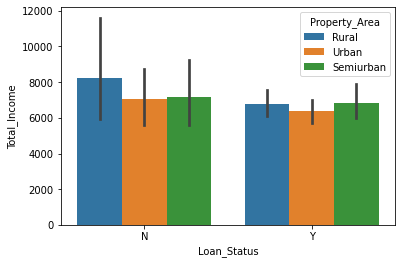

In [16]:
sns.barplot(x = data.Loan_Status,y = data.Total_Income,hue= data.Property_Area)


In [17]:
a = data.groupby("Loan_Status")["Loan_Status"].count()
a

Loan_Status
N    148
Y    332
Name: Loan_Status, dtype: int64

In [18]:
N = 148
Y = 332
Total = 480
Y_percent = (332/480)*100
X_percent = (148/480)*100
X_percent,Y_percent

(30.833333333333336, 69.16666666666667)

- __The Imbalance in our dataset between the outcome variable is of mild type therefore we can Proceed with the dataset for further analysis.__

Text(0.5, 1.0, 'Distribution of yes and No')

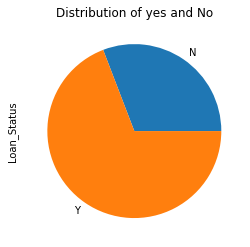

In [19]:
a.plot.pie()
plt.title("Distribution of yes and No")

In [20]:
# Before deploying our ML model we now need to convert the ordinal data in the form of 0s and 1s
mapping = {"Male":1, "Female":0}
data["Gender"] = data["Gender"].map(mapping)

In [21]:
mapping2 = {"Y": 1, "N": 0}
data["Loan_Status"] = data["Loan_Status"].map(mapping2)

In [22]:
mapping3 = {"Graduate": 1, "Not Graduate": 0}
data["Education"] = data["Education"].map(mapping3)

In [23]:
mapping4 = {"Yes": 1, "No": 0}
data["Married"] = data["Married"].map(mapping4)

In [24]:
mapping5 = {"Yes": 1, "No": 0}
data["Self_Employed"] = data["Self_Employed"].map(mapping5)

In [25]:
data=pd.get_dummies(data, columns=["Dependents","Property_Area"])
data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,6091.0,0,1,0,0,1,0,0
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,1,3000.0,1,0,0,0,0,0,1
3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,1,4941.0,1,0,0,0,0,0,1
4,1,0,1,0,6000,0.0,141.0,360.0,1.0,1,6000.0,1,0,0,0,0,0,1
5,1,1,1,1,5417,4196.0,267.0,360.0,1.0,1,9613.0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,2900.0,1,0,0,0,1,0,0
610,1,1,1,0,4106,0.0,40.0,180.0,1.0,1,4106.0,0,0,0,1,1,0,0
611,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,8312.0,0,1,0,0,0,0,1
612,1,1,1,0,7583,0.0,187.0,360.0,1.0,1,7583.0,0,0,1,0,0,0,1


# Exploratory Data Analysis

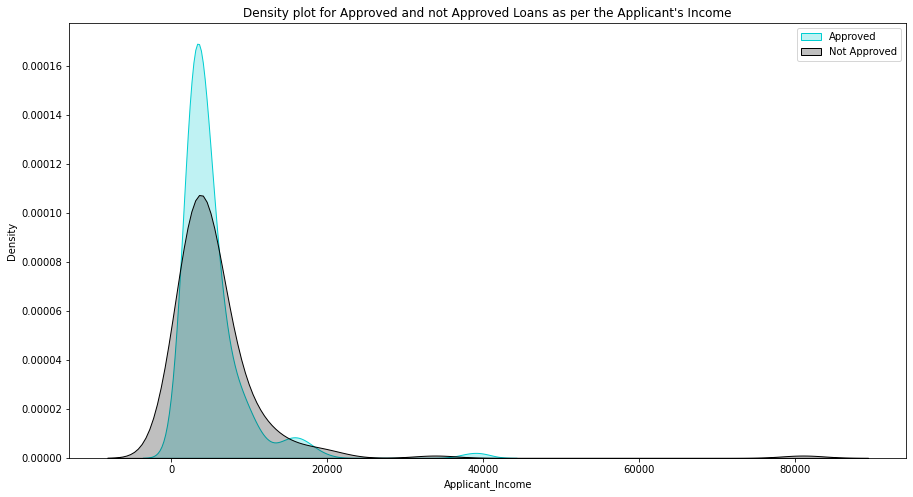

In [26]:
plt.figure(figsize= (15,8))
sns.kdeplot(data["ApplicantIncome"][data.Loan_Status == 1], color = "darkturquoise", shade=True )
sns.kdeplot(data["ApplicantIncome"][data.Loan_Status == 0], color = "black", shade=True)
plt.legend(["Approved", "Not Approved"])
plt.title("Density plot for Approved and not Approved Loans as per the Applicant's Income")
plt.xlabel("Applicant_Income")
plt.ylabel("Density")
plt.show()

# Feature Engineering 

In [27]:
data["Total_Income"] = data["ApplicantIncome"]+ data["CoapplicantIncome"]
data["Total_Income"]

1      6091.0
2      3000.0
3      4941.0
4      6000.0
5      9613.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: Total_Income, Length: 480, dtype: float64

In [28]:
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,6091.0,0,1,0,0,1,0,0
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,1,3000.0,1,0,0,0,0,0,1
3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,1,4941.0,1,0,0,0,0,0,1
4,1,0,1,0,6000,0.0,141.0,360.0,1.0,1,6000.0,1,0,0,0,0,0,1
5,1,1,1,1,5417,4196.0,267.0,360.0,1.0,1,9613.0,0,0,1,0,0,0,1


In [29]:
data.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Gender,1.000000,0.349424,-0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,0.064504,0.099472,-0.185582,-0.009718,0.159802,0.123341,0.058739,-0.108538,0.057137
Married,0.349424,1.000000,-0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.112321,0.080003,-0.410047,0.154106,0.261974,0.162856,-0.039048,0.011121,0.026467
Education,-0.059245,-0.001652,1.000000,0.005085,0.131172,0.074499,0.172780,0.102168,0.056656,0.068437,0.157209,0.014369,0.016242,-0.011184,-0.031827,-0.067607,0.038137,0.025884
Self_Employed,-0.002761,0.015674,0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.034715,0.161492,-0.081585,0.081164,0.036647,-0.013798,0.051851,-0.015604,-0.034261
ApplicantIncome,0.032644,0.036717,0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.043152,0.900097,-0.121405,0.071367,-0.017426,0.143633,0.045154,0.000551,-0.044767
CoapplicantIncome,0.156171,0.102950,0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,-0.049020,0.331580,0.000991,-0.016015,0.028266,-0.019006,-0.001101,-0.008322,0.009866
LoanAmount,0.098975,0.183442,0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.071753,0.553914,-0.178494,0.087870,0.061174,0.115373,0.086569,0.013365,-0.098826
Loan_Amount_Term,-0.088704,-0.107504,0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.007798,-0.012822,0.118518,-0.101258,-0.005885,-0.066826,0.033777,0.030346,-0.065097
Credit_History,0.022447,0.029095,0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.529390,-0.057126,0.011429,-0.005280,0.037047,-0.063797,-0.022504,0.046480,-0.027062
Loan_Status,0.064504,0.112321,0.068437,-0.034715,-0.043152,-0.049020,-0.071753,-0.007798,0.529390,1.000000,-0.062465,-0.022938,-0.040350,0.073368,-0.005784,-0.110817,0.155686,-0.055964


-  __The feature Total_Amount is showing better correlation as compared to the Applicant and coapplicant income.__

- __So we can keep this newly engineered feature and can use it for further analysis.__

In [30]:
data_new = data.drop(columns= ["ApplicantIncome", "CoapplicantIncome"])
data_new


,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1,1,0,128.0,360.0,1.0,0,6091.0,0,1,0,0,1,0,0
2,1,1,1,1,66.0,360.0,1.0,1,3000.0,1,0,0,0,0,0,1
3,1,1,0,0,120.0,360.0,1.0,1,4941.0,1,0,0,0,0,0,1
4,1,0,1,0,141.0,360.0,1.0,1,6000.0,1,0,0,0,0,0,1
5,1,1,1,1,267.0,360.0,1.0,1,9613.0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,71.0,360.0,1.0,1,2900.0,1,0,0,0,1,0,0
610,1,1,1,0,40.0,180.0,1.0,1,4106.0,0,0,0,1,1,0,0
611,1,1,1,0,253.0,360.0,1.0,1,8312.0,0,1,0,0,0,0,1
612,1,1,1,0,187.0,360.0,1.0,1,7583.0,0,0,1,0,0,0,1


In [31]:
data_new["Total_Income"].max()

81000.0

In [32]:
data_new.groupby(data_new["Married"] == 0)["Loan_Status"].count()

Married
False    311
True     169
Name: Loan_Status, dtype: int64

In [33]:
unmarried = data_new.groupby(data_new["Married"] == 1)["Loan_Status"].count()
unmarried

Married
False    169
True     311
Name: Loan_Status, dtype: int64

Text(0.5, 1.0, 'Loan_Status(Approval) for Married individual')

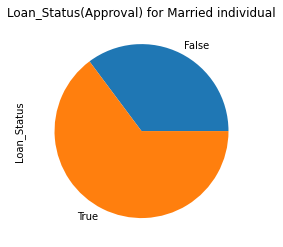

In [34]:
unmarried.plot.pie()
plt.title("Loan_Status(Approval) for Married individual")

# Univariate Analysis

D:\python3.10.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Income'>

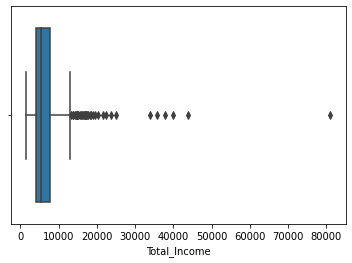

In [35]:
sns.boxplot(data_new["Total_Income"])

In [36]:
Q1 = np.quantile(data_new["Total_Income"], 0.25)
Q3 = np.quantile(data_new["Total_Income"], 0.75)
iqr = Q3-Q1

Q1,Q3,iqr

(4148.0, 7672.5, 3524.5)

In [37]:
upper_bound = Q3+ 1.5*iqr
lower_bound = Q1 - 1.5*iqr

upper_bound,lower_bound

(12959.25, -1138.75)

In [38]:
data_new["Total_Income"] = np.where(data_new["Total_Income"] > upper_bound,upper_bound, data_new["Total_Income"])
data_new["Total_Income"] = np.where(data_new["Total_Income"] < lower_bound, lower_bound, data_new["Total_Income"])



D:\python3.10.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Income'>

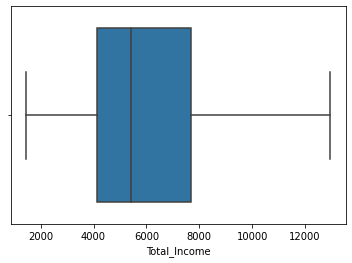

In [39]:
sns.boxplot(data_new["Total_Income"])

In [40]:
data_new["Total_Income"].skew()

0.9607367608753012

<AxesSubplot:xlabel='Total_Income', ylabel='Count'>

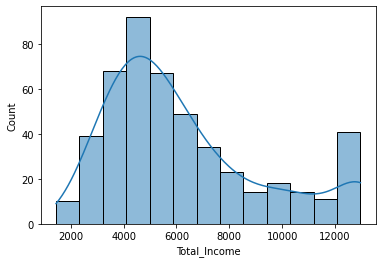

In [41]:
sns.histplot(data_new["Total_Income"], kde = True)


In [42]:
data_new["Total_Income"] = np.log(data_new["Total_Income"])
data_new["Total_Income"].skew()


0.1319428947747819

<AxesSubplot:xlabel='Total_Income', ylabel='Count'>

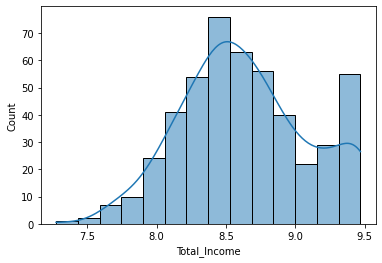

In [43]:
sns.histplot(data_new["Total_Income"], kde = True)


- __As we can see using log transformation we have transformed the total_income feature.__

# We can conclude that the Density of both approved and not approved loans is same for both approved and not approved loans.

D:\python3.10.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Loan_Status'>

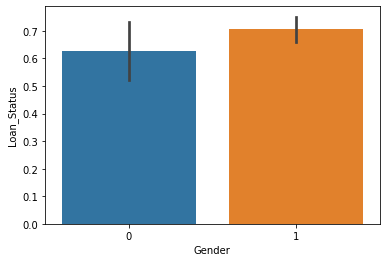

In [44]:
sns.barplot(data_new.Gender, data_new.Loan_Status,data = data_new, label = True)

In [45]:
data_new.corr()

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Gender,1.000000,0.349424,-0.059245,-0.002761,0.098975,-0.088704,0.022447,0.064504,0.171528,-0.185582,-0.009718,0.159802,0.123341,0.058739,-0.108538,0.057137
Married,0.349424,1.000000,-0.001652,0.015674,0.183442,-0.107504,0.029095,0.112321,0.161912,-0.410047,0.154106,0.261974,0.162856,-0.039048,0.011121,0.026467
Education,-0.059245,-0.001652,1.000000,0.005085,0.172780,0.102168,0.056656,0.068437,0.205521,0.014369,0.016242,-0.011184,-0.031827,-0.067607,0.038137,0.025884
Self_Employed,-0.002761,0.015674,0.005085,1.000000,0.120389,-0.034852,-0.023568,-0.034715,0.222497,-0.081585,0.081164,0.036647,-0.013798,0.051851,-0.015604,-0.034261
LoanAmount,0.098975,0.183442,0.172780,0.120389,1.000000,0.050867,-0.040773,-0.071753,0.656431,-0.178494,0.087870,0.061174,0.115373,0.086569,0.013365,-0.098826
Loan_Amount_Term,-0.088704,-0.107504,0.102168,-0.034852,0.050867,1.000000,0.032937,-0.007798,-0.032761,0.118518,-0.101258,-0.005885,-0.066826,0.033777,0.030346,-0.065097
Credit_History,0.022447,0.029095,0.056656,-0.023568,-0.040773,0.032937,1.000000,0.529390,0.009088,0.011429,-0.005280,0.037047,-0.063797,-0.022504,0.046480,-0.027062
Loan_Status,0.064504,0.112321,0.068437,-0.034715,-0.071753,-0.007798,0.529390,1.000000,0.020316,-0.022938,-0.040350,0.073368,-0.005784,-0.110817,0.155686,-0.055964
Total_Income,0.171528,0.161912,0.205521,0.222497,0.656431,-0.032761,0.009088,0.020316,1.000000,-0.124849,0.073102,0.041985,0.066275,0.063576,-0.038512,-0.021544
Dependents_0,-0.185582,-0.410047,0.014369,-0.081585,-0.178494,0.118518,0.011429,-0.022938,-0.124849,1.000000,-0.515771,-0.534999,-0.352453,0.043191,0.034147,-0.078323


# Implementing Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix,precision_recall_curve, roc_curve,roc_auc_score, log_loss, ConfusionMatrixDisplay



In [47]:
X = data_new.drop(columns= "Loan_Status")
Y = data_new["Loan_Status"]

# Splitting the dataset into training and test dataset

In [48]:
x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size= 0.2,random_state= 101)

In [49]:
x_test

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
288,0,0,1,0,115.0,360.0,1.0,8.324579,1,0,0,0,0,1,0
166,0,1,1,0,112.0,360.0,1.0,8.430109,1,0,0,0,1,0,0
529,1,0,0,0,130.0,360.0,1.0,8.822175,1,0,0,0,0,1,0
41,1,0,1,0,47.0,360.0,1.0,8.010692,1,0,0,0,0,0,1
201,1,0,1,0,166.0,360.0,0.0,8.501673,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,1,0,1,1,84.0,360.0,1.0,8.865735,1,0,0,0,0,1,0
328,0,1,1,0,110.0,360.0,1.0,8.822322,1,0,0,0,0,0,1
321,1,1,1,0,124.0,360.0,1.0,8.418698,0,0,0,1,0,1,0
266,1,1,1,0,150.0,360.0,1.0,8.715224,0,0,1,0,0,1,0


In [50]:
lor = LogisticRegression()
lor.fit(x_train,y_train)

D:\python3.10.4\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred = lor.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [52]:
np.array(y_test)

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [53]:
print("Accuracy Acore :", accuracy_score(y_test,y_pred))

Accuracy Acore : 0.78125


- __The accuracy score of our Logistic Regression model of Loan_Approval prediction is found to be around 78% accurate.__


# Now we will check the performance of our model using Confusion matrix

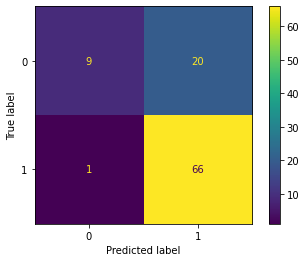

In [54]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= lor.classes_)
disp.plot()
plt.show()

In [55]:
precision = 66/66+1
recall = 66/66+20
precision,recall

(2.0, 21.0)

In [56]:
print('CLASSIFICATION REPORT\n')
print(classification_report(y_test, y_pred))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.90      0.31      0.46        29
           1       0.77      0.99      0.86        67

    accuracy                           0.78        96
   macro avg       0.83      0.65      0.66        96
weighted avg       0.81      0.78      0.74        96



- __The Area Under the ROC curve (AUC) is an aggregated metric that evaluates how well a logistic regression model classifies positive and negative outcomes at all possible cutoffs. Hence it can be used to compare different cut-offs or different logistinc regression models.__

In [57]:
train_probs = lor.predict_proba(x_train)

In [58]:
train_probs

array([[0.21296943, 0.78703057],
       [0.14129959, 0.85870041],
       [0.08280541, 0.91719459],
       [0.18981463, 0.81018537],
       [0.06895194, 0.93104806],
       [0.14557234, 0.85442766],
       [0.38178682, 0.61821318],
       [0.34448167, 0.65551833],
       [0.88265082, 0.11734918],
       [0.14999594, 0.85000406],
       [0.08160882, 0.91839118],
       [0.94002216, 0.05997784],
       [0.11727834, 0.88272166],
       [0.13014095, 0.86985905],
       [0.19080898, 0.80919102],
       [0.08147923, 0.91852077],
       [0.85127522, 0.14872478],
       [0.33709661, 0.66290339],
       [0.18092824, 0.81907176],
       [0.33232829, 0.66767171],
       [0.2817552 , 0.7182448 ],
       [0.18052129, 0.81947871],
       [0.82001861, 0.17998139],
       [0.05852977, 0.94147023],
       [0.13676966, 0.86323034],
       [0.22852455, 0.77147545],
       [0.10622785, 0.89377215],
       [0.20122594, 0.79877406],
       [0.16763047, 0.83236953],
       [0.27272809, 0.72727191],
       [0.

ROC CURVE


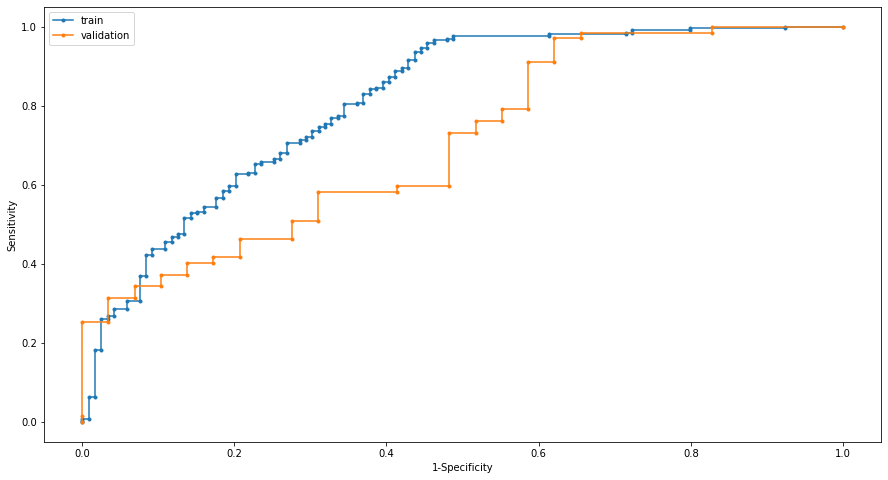

In [59]:

# ROC CURVE
print('ROC CURVE')
train_probs = lor.predict_proba(x_train)
train_probs1 = train_probs[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(y_train, train_probs1)

test_probs = lor.predict_proba(x_test)
test_probs1 = test_probs[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, test_probs1)
plt.figure(figsize=(15,8))
plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

True positive rate = Recall = Sensitivity
False positive rate = 1-Specificity

Sensitivity = (number correctly identified 1s)/(total number observed 1s)
Specificity = (number correctly identified 0s)/(total number observed 0s)

- __After getting the classification report of our model we came to the conclusion that our model is able to distinguish better in terms of Loan_Approval.__

- __The reason being that our recall is high that means out of All observed true positives we are able to find truely positives in a better manner to probability to ignore the eligible customer(False negative) is less.__

- __As our aim here is to avoid giving loans to the less eligible customer.__

In [60]:
# Now we will apply Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
rfc = RandomForestClassifier(n_estimators=3,max_depth=10, random_state=2)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [61]:
pred_rfc

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [62]:
np.array(y_test)

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [63]:
score = accuracy_score(y_test,pred_rfc)
score

0.71875

In [64]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.54      0.45      0.49        29
           1       0.78      0.84      0.81        67

    accuracy                           0.72        96
   macro avg       0.66      0.64      0.65        96
weighted avg       0.71      0.72      0.71        96



In [65]:
train_prob = rfc.predict_proba(x_train)
train_prob1 =  train_prob[:,1]

test_prob = rfc.predict_proba(x_test)
test_prob1 =  test_prob[:,1]

- __If we compare this result with the logistic regression model then we can clearly define that the logistic regression model is performing better.__

ROC CURVE


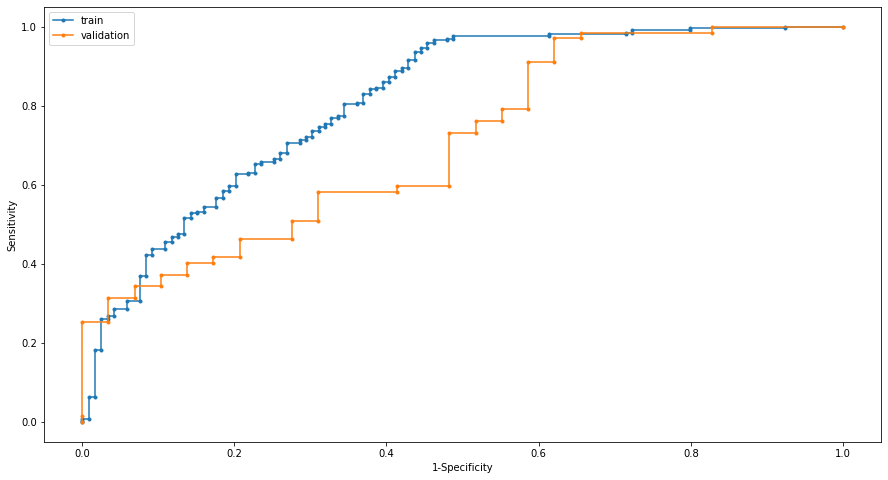

In [66]:
# ROC CURVE
print('ROC CURVE')
train_prob = lor.predict_proba(x_train)
train_prob1 = train_prob[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(y_train, train_prob1)

test_prob = lor.predict_proba(x_test)
test_prob1 = test_prob[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, test_prob1)
plt.figure(figsize=(15,8))
plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()